# Student Loan Risk with Deep Learning

In [2]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [3]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [5]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [6]:
# Define the target set y using the credit_ranking column
y = loans_df["credit_ranking"]

# Display a sample of y
y.head()


0    0
1    0
2    0
3    1
4    0
Name: credit_ranking, dtype: int64

In [7]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns=["credit_ranking"])
# Review the features DataFrame
X.head()


,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [8]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [10]:
# Create a StandardScaler instance
scaler = StandardScaler()


# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)

# Fit the scaler to the features training dataset
X_test_scaled = X_scaler.transform(X_test)
    



---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [11]:
# Define the the number of inputs (features) to the model
input_dim = X_train_scaled.shape[1]

# Review the number of features
input_dim

11

In [13]:
#define the model
model = Sequential([
    Dense(units=32, input_dim=input_dim, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=1, activation="sigmoid")
])

# Display the Sequential model summary
model.summary()

/Users/robertoreis/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [14]:
# Compile the Sequential model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8361 - loss: 0.3802 - val_accuracy: 0.7542 - val_loss: 0.5240
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.8115 - loss: 0.3967 - val_accuracy: 0.7500 - val_loss: 0.5229
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.8215 - loss: 0.3840 - val_accuracy: 0.7542 - val_loss: 0.5249
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8214 - loss: 0.3942 - val_accuracy: 0.7458 - val_loss: 0.5274
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.8300 - loss: 0.3869 - val_accuracy: 0.7583 - val_loss: 0.5281
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.8415 - loss: 0.3744 - val_accuracy: 0.7500 - val_loss: 0.5285
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.8560 - loss: 0.3650 - val_accuracy: 0.7583 - val_loss: 0.5287
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8287 - loss: 0.3851 - val_accuracy: 0.74

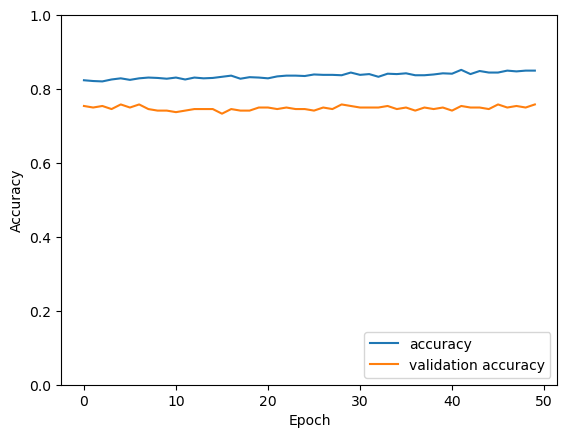

In [16]:
# Fit the model using 50 epochs and the training data
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

import matplotlib.pyplot as plt
# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [17]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.7783 - loss: 0.5788
Test Loss: 0.6234085559844971, Test Accuracy: 0.7524999976158142


In [18]:
# Reload your saved model
from tensorflow.keras.models import load_model

# Set the model's file path
file_path = Path("student_loans.keras")

# Load the model
loaded_model = load_model(file_path)

# Make predictions with the test data
predictions = loaded_model.predict(X_test_scaled)

# Display a sample of the predictions
print("Sample predictions:")
print(predictions[:5])

# Save the predictions to a DataFrame and round the predictions to binary results
predictions_df = pd.DataFrame(predictions, columns=['predictions'])
predictions_df['predictions'] = predictions_df['predictions'].round()

# Display the first few rows of the predictions DataFrame
print("\nPredictions DataFrame:")
print(predictions_df.head())

# Generate a classification report
from sklearn.metrics import classification_report

# Convert predictions to binary values
y_pred = predictions_df['predictions'].astype(int)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Sample predictions:
[[0.42676234]
 [0.37379768]
 [0.79459363]
 [0.7491732 ]
 [0.97768766]]

Predictions DataFrame:
   predictions
0          0.0
1          0.0
2          1.0
3          1.0
4          1.0

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       188
           1       0.80      0.75      0.77       212

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



In [15]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data


# Display the model loss and accuracy results


13/13 - 0s - loss: 0.5049 - accuracy: 0.7350 - 175ms/epoch - 13ms/step
Loss: 0.5049149394035339, Accuracy: 0.7350000143051147


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [16]:
# Set the model's file path


# Export your model to a keras file


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [17]:
# Set the model's file path
file_path = Path("student_loans.keras")

# Load the model to a new object
loaded_model = load_model(file_path)


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [20]:
# Make predictions with the test data
predictions = loaded_model.predict(X_test_scaled)


# Display a sample of the predictions
print("Sample predictions:")
print(predictions[:5])


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
Sample predictions:
[[0.42676234]
 [0.37379768]
 [0.79459363]
 [0.7491732 ]
 [0.97768766]]


In [21]:
# Save the predictions to a DataFrame and round the predictions to binary results
predictions_df = pd.DataFrame(predictions, columns=['predictions'])


### Step 4: Display a classification report with the y test data and predictions

In [23]:
# Print the classification report with the y test data and predictions
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       188
           1       0.80      0.75      0.77       212

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**

To build an effective student loan recommendation system, we would need to collect the following types of data:
Student information:
Academic performance (GPA, standardized test scores)
Field of study
Year in school
Expected graduation date
Extracurricular activities and achievements
Financial information:
Family income
Expected family contribution
Other financial aid received (scholarships, grants)
Student's current assets and debts
Loan details:
Loan amounts
Interest rates
Repayment terms
Eligibility criteria
Lender information
Career and future earnings potential:
Projected salary for chosen field
Job placement rates for the student's program
Economic outlook for relevant industries
This data is relevant and appropriate because it provides a comprehensive view of the student's academic background, financial situation, and future earning potential. It allows the system to match students with loan options that are both financially feasible and aligned with their educational and career goals.


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**

Based on the data described, a content-based filtering approach would be most suitable for this recommendation system.
Content-based filtering makes recommendations based on the characteristics of the items (in this case, loan options) and the user's profile (student information). This method is appropriate because:
1. It can directly match loan features (amounts, interest rates, terms) with student characteristics (financial need, academic performance, field of study).
2. It doesn't require data on other users' choices, which may be limited or irrelevant in the context of student loans.
It can provide personalized recommendations based on each student's unique situation, rather than relying on similarities between users.
4. It can easily incorporate domain knowledge, such as linking certain fields of study with specific loan programs or considering future earning potential in loan recommendations.


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**


1. Data privacy and security:
Student loan recommendations require sensitive personal and financial information. Ensuring the security and privacy of this data is crucial. There are strict regulations (like FERPA in the US) governing student data. Breaches could have severe consequences for students and institutions. The system must be designed with robust security measures and comply with all relevant data protection laws.
Ethical considerations and potential bias:
There's a risk that the recommendation system could perpetuate or exacerbate existing inequalities in education financing. For example, it might consistently recommend lower loan amounts or less favorable terms to students from certain backgrounds or in certain fields of study. This could limit educational opportunities for some groups. Ensuring fairness and avoiding bias in the recommendations is crucial but challenging, as biases can be subtle and deeply ingrained in historical data.
These challenges are particularly concerning for a student loan recommendation system because of the long-term impact of student loan decisions on individuals' lives. Inaccurate or biased recommendations could lead to financial hardship or limited career options for students. Additionally, given the sensitive nature of financial decisions, maintaining trust in the system is paramount for its adoption and effectiveness.
